# Overview

In this notebook, I analyzed this dataset and the goal was to predict whether or not a patient has diabetes based on various features

I started by exploring the dataset using **Seaborn**  after that, modeling this dataset using **Pycaret**



# <b>1 <span style='color:#73B1A6'>|</span> Importing Data</b>

In [10]:
!pip install pycaret -q 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

sns.set_style("whitegrid")

set_matplotlib_formats('svg')
plt.rcParams['axes.edgecolor'] = 'black'


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

# <b>2 <span style='color:#73B1A6'>|</span> EDA </b>

In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [16]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
df = df.drop_duplicates()

In [18]:
df.diabetes.value_counts(normalize = True).mul(100)

0    91.178
1     8.822
Name: diabetes, dtype: float64

## <b>2.1 <span style='color:#73B1A6'>|</span> Categorical Data And Visualizations </b>

In [19]:
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object']

In [20]:
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


gender:
Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

smoking_history:
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64


In [21]:
pd.crosstab(df.gender, df.diabetes, margins = True)

diabetes,0,1,All
gender,,,
Female,51714,4447,56161
Male,35932,4035,39967
Other,18,0,18
All,87664,8482,96146


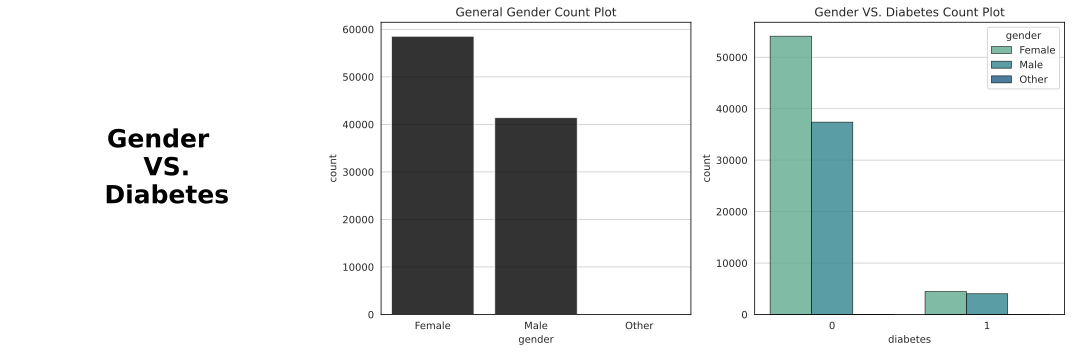

In [3]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')


plt.subplot(1,3, 2)

sns.countplot(x = df['gender'], color = "black",  alpha = 0.8, saturation =1)

plt.title("General Gender Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x = df['diabetes'], hue = df['gender'],   palette='crest', linewidth = 0.7, alpha = 0.8, edgecolor = 'k', saturation =1)
plt.title("Gender VS. Diabetes Count Plot")

plt.tight_layout()
plt.show()

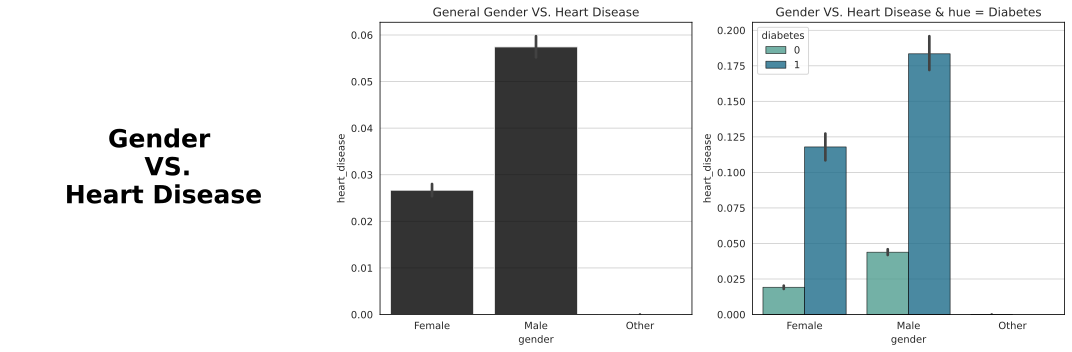

In [4]:
fig = plt.figure(figsize = (15,5))
ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Heart Disease ", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')
plt.subplot(1,3, 2)

sns.barplot(x = 'gender' , y = 'heart_disease', data = df,  color = "black",  alpha = 0.8, saturation =1)
plt.title("General Gender VS. Heart Disease")


plt.subplot(1,3, 3)
sns.barplot(x = 'gender' , y = 'heart_disease', hue = 'diabetes' , data = df,  palette='crest', linewidth = 0.7, edgecolor = 'k',alpha = 0.8, saturation =1)
plt.title("Gender VS. Heart Disease & hue = Diabetes")

plt.tight_layout()
plt.show()

In [24]:
pd.crosstab(df.gender, df.hypertension, margins = True)

hypertension,0,1,All
gender,,,
Female,51982,4179,56161
Male,36685,3282,39967
Other,18,0,18
All,88685,7461,96146


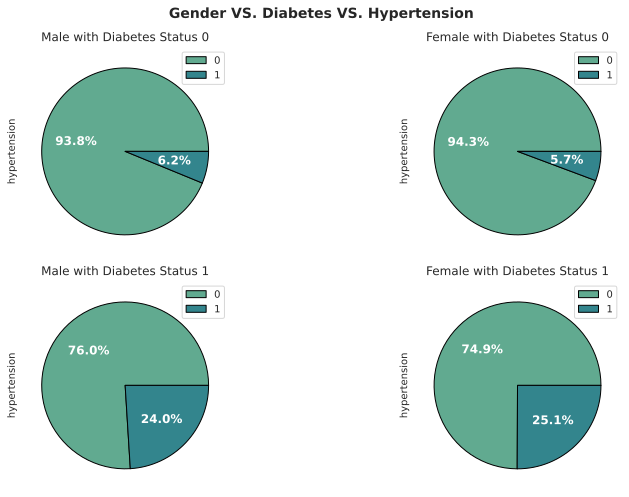

In [5]:
fig = plt.figure(figsize=(13, 7))
subgroups = [('Male', 0), ('Female', 0), ('Male', 1), ('Female', 1)]


colors = sns.color_palette("crest", 3)


for i, subgroup in enumerate(subgroups):
    gender, diabetes = subgroup
    ax = plt.subplot(2, 2, i + 1)
    data = df[(df['gender'] == gender) & (df['diabetes'] == diabetes)]
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    textprops = {'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
    data['hypertension'].value_counts().plot(kind='pie', colors=colors, wedgeprops=wedgeprops, textprops=textprops, autopct='%1.1f%%')

    plt.title(f'{gender} with Diabetes Status {diabetes}')

    plt.legend()

fig.suptitle("Gender VS. Diabetes VS. Hypertension", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


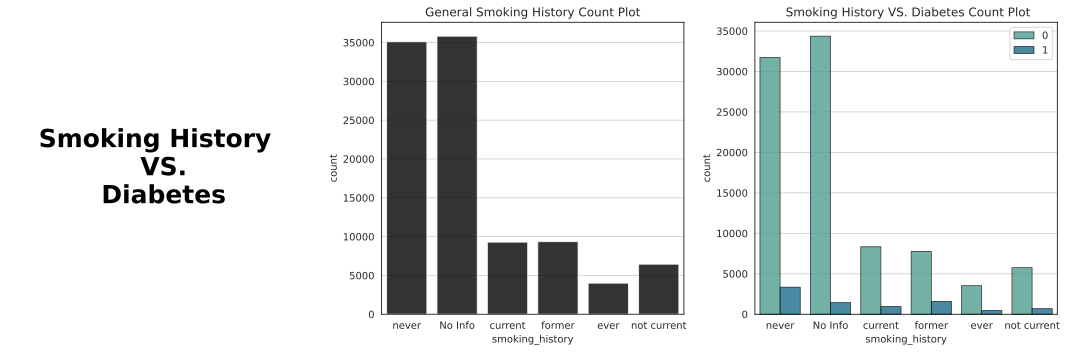

In [10]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Smoking History \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor("#97C8A7")
ax.axis('off')



plt.subplot(1,3, 2)
counts = df['smoking_history'].value_counts().reset_index().sort_values(by = 'smoking_history', ascending = False)
sns.countplot(x = 'smoking_history', data = df, color = "black", alpha = 0.8, saturation =1)
plt.title("General Smoking History Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x =df['smoking_history'] , hue = df['diabetes'] ,   palette='crest', linewidth = 0.7, edgecolor = 'k', saturation =1, alpha = 0.8)
plt.title(" Smoking History VS. Diabetes Count Plot")



plt.legend()
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab(df.smoking_history, df.diabetes, margins = True)

diabetes,0,1,All
smoking_history,,,
No Info,31442,1445,32887
current,8249,948,9197
ever,3526,472,3998
former,7709,1590,9299
never,31061,3337,34398
not current,5677,690,6367
All,87664,8482,96146


In [28]:
pd.crosstab(df.gender, df.smoking_history, margins = True)

smoking_history,No Info,current,ever,former,never,not current,All
gender,,,,,,,
Female,17969,5011,2236,4743,22339,3863,56161
Male,14912,4186,1761,4556,12056,2496,39967
Other,6,0,1,0,3,8,18
All,32887,9197,3998,9299,34398,6367,96146


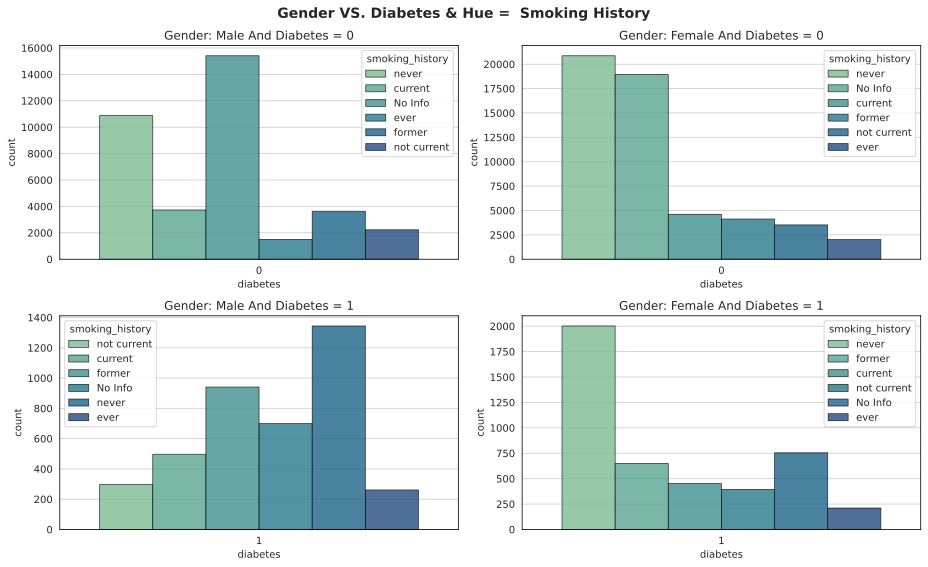

In [7]:

fig = plt.figure(figsize = (13,8))

df_male = df[(df.gender == 'Male') & (df.diabetes == 0)]
plt.subplot(2,2,1)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 0")

plt.subplot(2,2,2)
df_female = df[(df.gender == 'Female') & (df.diabetes == 0)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 0")

df_male = df[(df.gender == 'Male') & (df.diabetes == 1)]
plt.subplot(2,2,3)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 1")

plt.subplot(2,2,4)
df_female = df[(df.gender == 'Female') & (df.diabetes == 1)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 1")
fig.suptitle("Gender VS. Diabetes & Hue =  Smoking History", fontsize=14, fontweight='bold')





plt.tight_layout()

plt.show()

## <b>2.2 <span style='color:#73B1A6'>|</span> Continuous Data And Visualizations</b>

In [32]:
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']

In [84]:
zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0]
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]


91.17800012481018

In [98]:
ax.patches[0].get_x()
ax.patches[0].get_height()

0

In [95]:
for i in ax.patches:
    print(i)

Rectangle(xy=(-0.25, 0), width=0.5, height=87664, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=8482, angle=0)


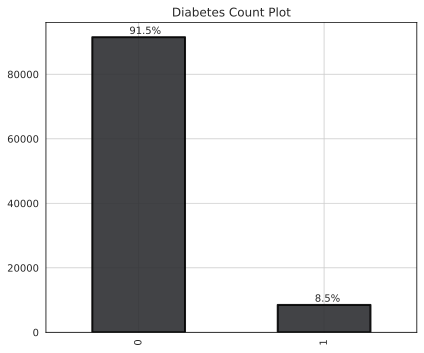

In [8]:
fig = plt.figure(figsize = (6,5))

zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0] #getting percentage of 0 class
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]  #getting percentage of 1 class

ax = df['diabetes'].value_counts().plot(kind = 'bar', color = '#2E2F32', edgecolor = 'k', linewidth = 2, alpha = 0.9)

ax.text(ax.patches[0].get_x() + 0.2 ,ax.patches[0].get_height() + 1000, f"{round(zero_per, 1)}%", fontsize = 10 ) #writing zero percentage to plot
ax.text(ax.patches[1].get_x() + 0.2 ,ax.patches[1].get_height() + 1000, f"{round(one_per, 1)}%", fontsize = 10 )  #writing one percentage to plot

plt.title("Diabetes Count Plot")


plt.tight_layout()
plt.show()

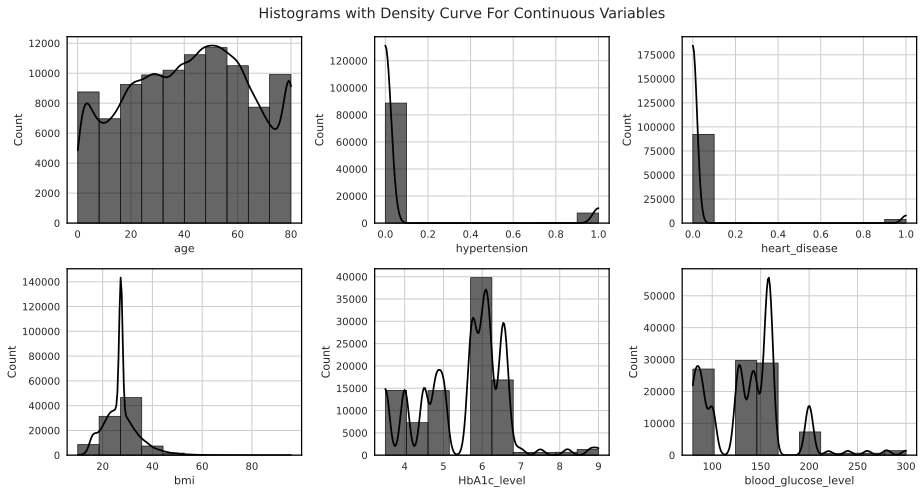

In [232]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 7))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[con_cols[i]], bins = 10, kde = True, ax = ax, color = "black", edgecolor = 'k', linewidth = 0.7, alpha = 0.6)
fig.suptitle("Histograms with Density Curve For Continuous Variables")
plt.tight_layout()
plt.show()


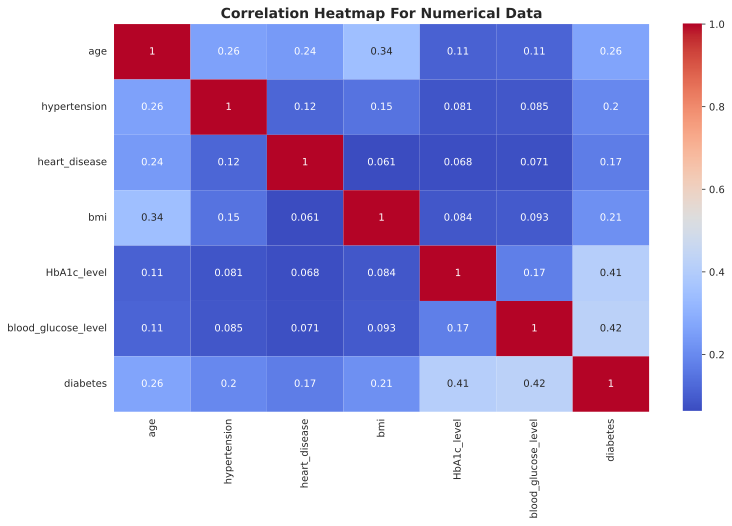

In [34]:
plt.figure(figsize = (12,7))
sns.heatmap(df[con_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

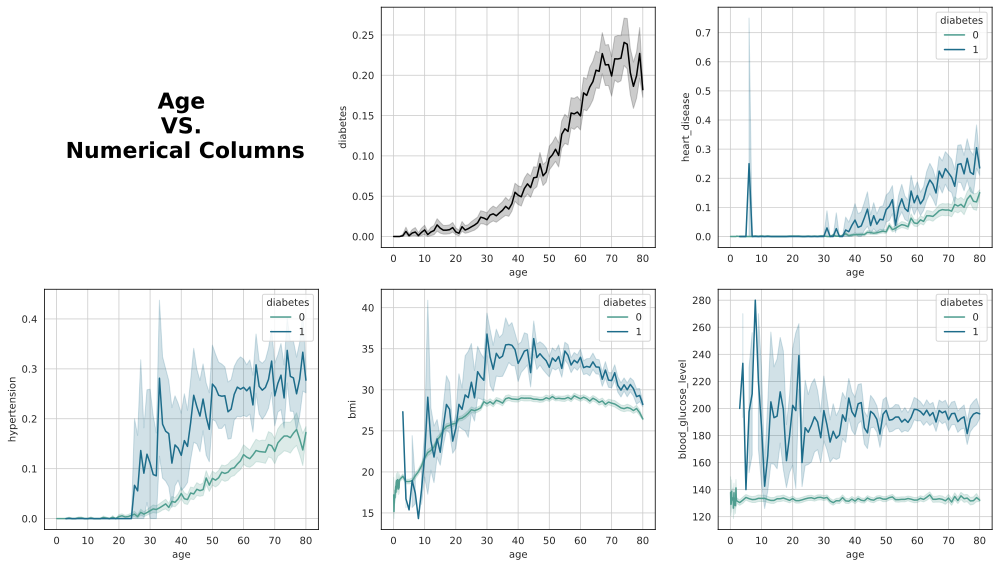

In [9]:
fig = plt.figure(figsize = (14,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Age\n VS. \n Numerical Columns", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor("")
ax.axis('off')

plt.subplot(2,3, 2)
sns.lineplot(x = df['age'], y =  df['diabetes'], color = "black")

plt.subplot(2,3,3)
sns.lineplot(x = df['age'], y =  df['heart_disease'], hue = df['diabetes'], palette='crest')


plt.subplot(2,3,4)
sns.lineplot(x = df['age'], y =  df['hypertension'], hue = df['diabetes'], palette='crest')

plt.subplot(2,3,5)
sns.lineplot(x = df['age'],y = df['bmi'], hue = df['diabetes'], palette='crest')

plt.subplot(2,3,6)
sns.lineplot(x = df['age'], y =  df['blood_glucose_level'], hue = df['diabetes'], palette='crest' )

plt.tight_layout()
plt.show()

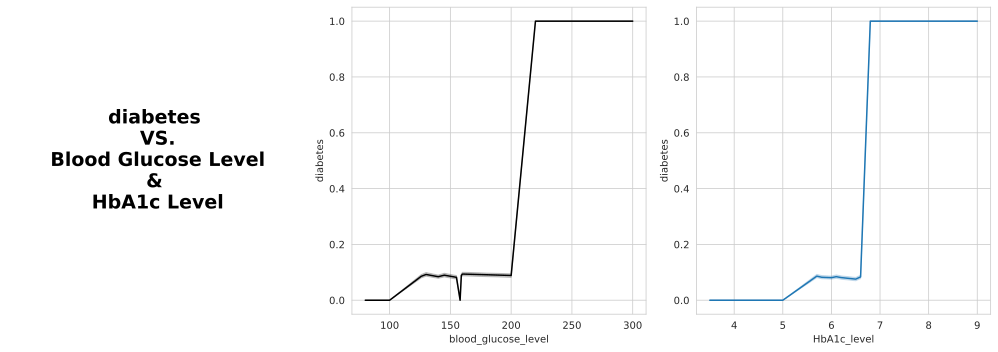

In [37]:
fig = plt.figure(figsize = (14, 5))


ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, " diabetes \n  VS. \n  Blood Glucose Level \n & \n HbA1c Level", fontdict={'fontsize': 19, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(1,3,2)
sns.lineplot(x = df['blood_glucose_level'], y =  df['diabetes'] , color = 'black' )


plt.subplot(1,3,3)
sns.lineplot(x = df['HbA1c_level'], y =  df['diabetes'] )

plt.tight_layout()

### Filtering HbA1c_level based on gender and diabetes

<img src="https://images.ctfassets.net/9slb9bdvurju/7gXgDXajcyIsoypsNMT1ZF/6c7ff3268b5828756571030ee8789b7b/A1c8.png" width="800">
<img src="https://www.breathewellbeing.in/blog/wp-content/uploads/2021/03/Diabetic-Control-chart.png" width="800">


In [49]:
tf = df[df['gender'] != 'Other']

pd.crosstab(index=df['blood_glucose_level'], columns=[tf['gender'], tf['diabetes']], values=tf['HbA1c_level'], aggfunc='mean', margins=True).fillna(0).round(1)

gender              Female      Male       All
diabetes                 0    1    0    1     
blood_glucose_level                           
80                     5.4  0.0  5.4  0.0  5.4
85                     5.4  0.0  5.4  0.0  5.4
90                     5.4  0.0  5.4  0.0  5.4
100                    5.4  0.0  5.4  0.0  5.4
126                    5.4  6.9  5.4  6.9  5.5
130                    5.4  6.9  5.4  7.0  5.5
140                    5.4  7.1  5.4  6.8  5.5
145                    5.4  6.9  5.4  6.9  5.5
155                    5.4  6.9  5.4  7.0  5.5
158                    5.4  0.0  5.4  0.0  5.4
159                    5.4  6.9  5.4  7.0  5.5
160                    5.4  6.9  5.4  7.0  5.5
200                    5.4  7.0  5.4  6.9  5.5
220                    0.0  6.9  0.0  7.0  7.0
240                    0.0  6.9  0.0  6.9  6.9
260                    0.0  7.0  0.0  6.8  6.9
280                    0.0  6.9  0.0  6.9  6.9
300                    0.0  7.0  0.0  6.9  6.9
All                    5.4  6.9  5.4  6.9  5.5

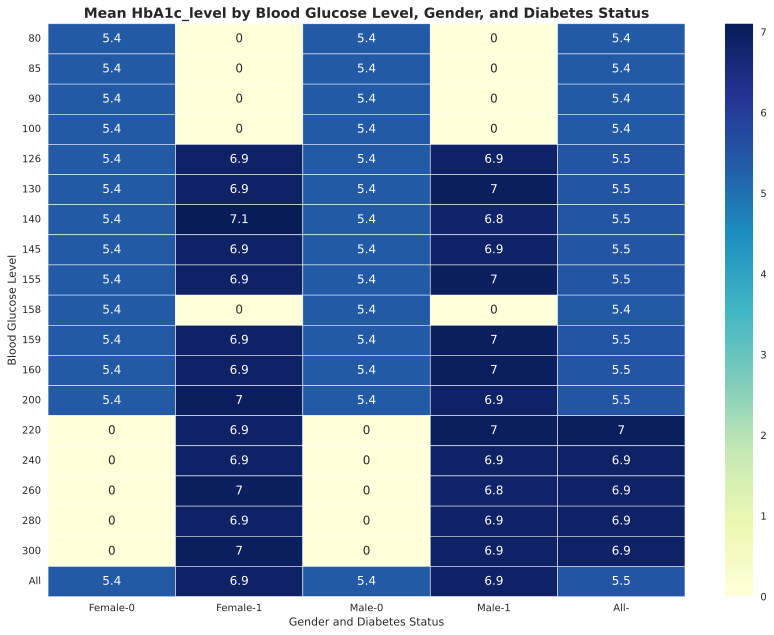

In [48]:

tf = df[df['gender'] != 'Other']

table = pd.crosstab(index=df['blood_glucose_level'], columns=[tf['gender'], tf['diabetes']], values=tf['HbA1c_level'], aggfunc='mean', margins=True).fillna(0).round(1)
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(table, annot=True,  cmap='YlGnBu', linewidths=.5, ax=ax)

plt.title('Mean HbA1c_level by Blood Glucose Level, Gender, and Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Gender and Diabetes Status')
plt.yticks(rotation = 1)
plt.ylabel('Blood Glucose Level')
plt.tight_layout()
plt.show()


# <b>3 <span style='color:#73B1A6'>|</span> Modeling Using Pycaret </b>

In [93]:
from pycaret.classification import *


In [94]:
df2 = df.copy()

In [95]:
s = setup(df2, target = 'diabetes', session_id = 123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 9)"
4,Transformed data shape,"(100000, 16)"
5,Transformed train set shape,"(70000, 16)"
6,Transformed test set shape,"(30000, 16)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9721,0.9788,0.6817,0.9849,0.8057,0.7912,0.8068,2.7050
lightgbm,Light Gradient Boosting Machine,0.9720,0.9784,0.6911,0.9708,0.8074,0.7927,0.8061,1.4960
ada,Ada Boost Classifier,0.9718,0.9789,0.6859,0.9752,0.8053,0.7906,0.8049,1.0650
xgboost,Extreme Gradient Boosting,0.9713,0.9775,0.6950,0.9550,0.8045,0.7894,0.8010,3.2890
catboost,CatBoost Classifier,0.9713,0.9776,0.6965,0.9536,0.8050,0.7899,0.8013,15.7620
rf,Random Forest Classifier,0.9700,0.9585,0.6864,0.9466,0.7957,0.7800,0.7918,2.6060
et,Extra Trees Classifier,0.9663,0.9510,0.6812,0.8975,0.7744,0.7566,0.7650,2.5680
lr,Logistic Regression,0.9599,0.9611,0.6252,0.8661,0.7260,0.7050,0.7160,3.2660
lda,Linear Discriminant Analysis,0.9564,0.9534,0.5867,0.8547,0.6956,0.6730,0.6870,0.2660
knn,K Neighbors Classifier,0.9537,0.8785,0.5314,0.8755,0.6613,0.6381,0.6611,0.5840


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

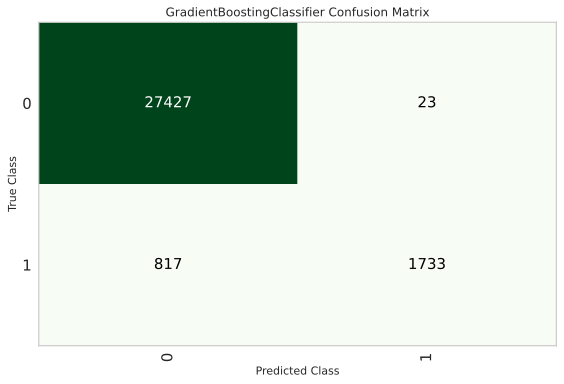

In [96]:
plot_model(best, plot = 'confusion_matrix')

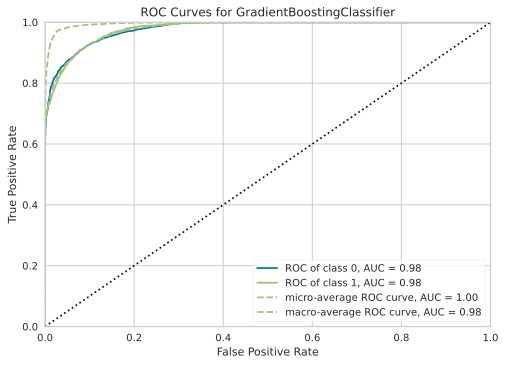

In [97]:
plot_model(best, plot = 'auc')

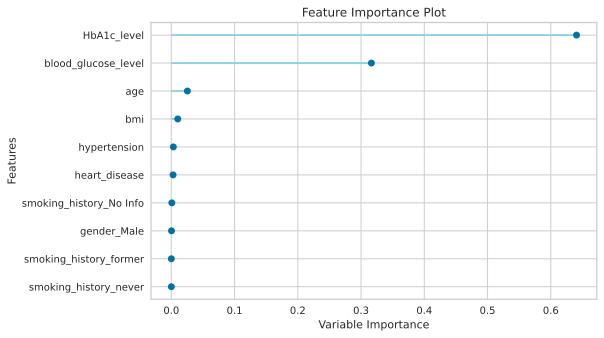

In [98]:
plot_model(best, plot = 'feature')

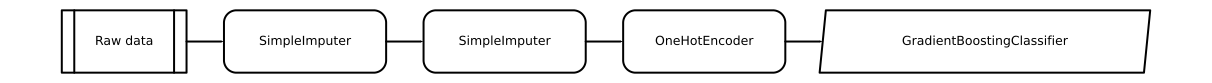

In [99]:
evaluate_model(best)

In [100]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9720,0.9794,0.6796,0.9869,0.8049,0.7904,0.8064


In [101]:
holdout_pred.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,prediction_label,prediction_score
80847,Male,8.0,0,0,No Info,18.700001,6.5,80,0,0,0.9982
69417,Female,58.0,0,0,No Info,26.389999,6.2,158,0,0,0.9865
6354,Female,22.0,0,0,No Info,34.279999,4.8,126,0,0,0.9991
61859,Male,27.0,0,0,current,27.320000,4.5,100,0,0,0.9994
12363,Female,58.0,0,0,never,36.860001,9.0,126,1,1,0.9925
13491,Male,80.0,1,1,never,27.000000,4.8,130,0,0,0.9981
31377,Female,3.0,0,0,No Info,21.129999,4.8,155,0,0,0.9983
38377,Female,75.0,0,0,No Info,27.780001,6.0,200,0,0,0.9300
58330,Male,39.0,0,0,current,51.980000,3.5,200,0,0,0.9991
39920,Female,43.0,0,0,ever,25.440001,5.7,85,0,0,0.9986


In [ ]:
save_model(best, 'my_pipeline')

# <b>4 <span style='color:#73B1A6'>|</span> Modeling Using XGB </b>


From we saw when from EDA there is a Class Imbalance
* class 0 around 92%
* class 1 around 8%

We will try to optimize the recall using GridSearchCV

> https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [206]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline


In [107]:
X = df.drop('diabetes', axis = 1 )
y = df.diabetes

In [139]:
encoded = pd.get_dummies(X[['smoking_history', 'gender']], drop_first = True)

In [143]:
X = pd.concat([ X.drop(['gender', 'smoking_history'],axis =1),   encoded  ], axis = 1)

In [149]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Expirement 1

In [167]:
model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [258]:
def report_model(model):
    y_train_repo = model.predict(X_train)
    y_test_repo = model.predict(X_test)
    print(f"the accuracy on train set {accuracy_score(y_train, y_train_repo)}")
    print(f"the accuracy on test set {accuracy_score(y_test, y_test_repo)}")
    print()
    print(classification_report(y_test , y_test_repo))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_repo)).plot()
    plt.show()

the accuracy on train set 0.9768857142857142
the accuracy on test set 0.9711

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.96      0.69      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.97      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000



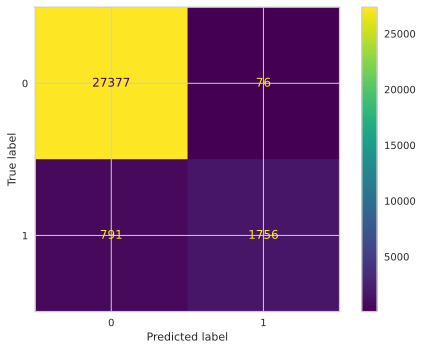

In [262]:
report_model(model = model)

In [177]:
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(XGBClassifier(), X_train , y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores.mean())

0.9710142857142857


#### using GridSearchCV to rech a high recall

In [210]:
weights = [2, 3 , 25, 50, 100]
param_grid = dict(scale_pos_weight=weights)

grid = GridSearchCV(XGBClassifier(), param_grid = param_grid , cv = cv, scoring = 'recall' )

In [211]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_ty...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logisti

In [213]:
print(f"best parameters: {grid.best_params_}")
print(f"best scores: {grid.best_score_}")
      

best parameters: {'scale_pos_weight': 100}
best scores: 0.9489309683604986


from that meaning recall around 95% and this will make a low percision due to Tradeoff between them

the accuracy on train set 0.8500571428571428
the accuracy on test set 0.8451

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     27453
           1       0.35      0.96      0.51      2547

    accuracy                           0.85     30000
   macro avg       0.67      0.90      0.71     30000
weighted avg       0.94      0.85      0.87     30000



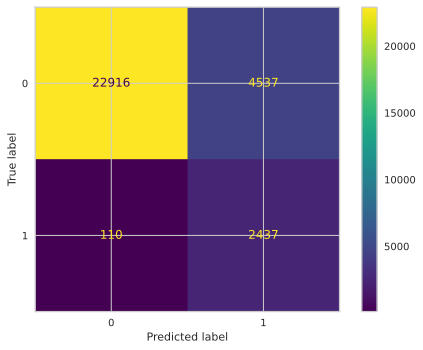

In [263]:
report_model(grid)

### different parameters
here trying to optimize the hyperparameters manually and see the results

In [244]:
model2 = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42 )
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

the accuracy on train set 0.9599857142857143
the accuracy on test set 0.9515333333333333

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     27453
           1       0.68      0.82      0.74      2547

    accuracy                           0.95     30000
   macro avg       0.83      0.89      0.86     30000
weighted avg       0.96      0.95      0.95     30000



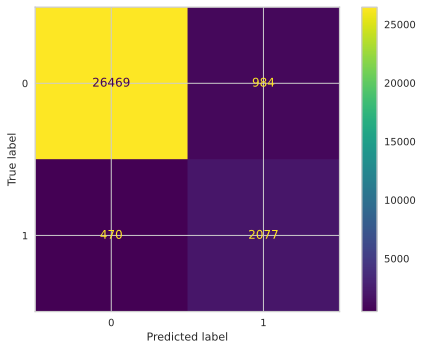

In [264]:
report_model(model2)

So we saw with differenct changes to scale_pos_weight can lead to higher model to Imbalance Datasets! we may optimize paramters using Optuna and so on

# <b>5 <span style='color:#73B1A6'>|</span> Ending </b>

Thank you for going through this! I hope you found it useful. If you enjoyed it, please consider upvoting. I'd love to hear your thoughts and start a discussion, so feel free to leave a comment!!